In [1]:
import os 
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img_path = "Felipe Cordeiro de Sousa UFC - Fig0224(galaxy_pair_original) (1).tif"
img = cv.imread(img_path, cv.IMREAD_GRAYSCALE)
print(f"Image.dtype: {img.dtype} e Image shape: {img.shape}")

Image.dtype: uint8 e Image shape: (598, 566)


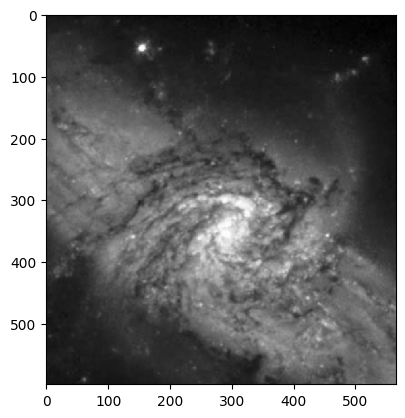

In [2]:
plt.imshow(img, cmap="gray")
plt.show()

In [17]:
def simular_media_de_imagens(
    imagem_array: np.ndarray, 
    lista_K: list, 
    mean:int=0, 
    std_dev:int=64
) -> list:
    """
    Simula o processo de redução de ruído pela média de K imagens ruidosas.
    Esta função opera em arrays NumPy, independentemente de como foram carregados.

    Argumentos:
        imagem_array (np.ndarray): O array NumPy da imagem original (uint8).
        lista_K (list): Lista de valores K a serem simulados.
        mean (int): Média do ruído gaussiano.
        std_dev (float): Desvio padrão do ruído gaussiano.

    Retorna:
        list: Uma lista de arrays NumPy (uint8), começando com o original.
    """
    # Converter para float64 para todos os cálculos
    imagem_original_float = imagem_array.astype(np.float64)
    imagens_resultado_np = []

    for k in sorted(lista_K):
        print(f"Processando para K = {k}...")
        acumulador = np.zeros_like(imagem_original_float)
        for _ in range(k):
            ruido = np.random.normal(mean, std_dev, imagem_original_float.shape)
            imagem_ruidosa = imagem_original_float + ruido
            acumulador += imagem_ruidosa
        
        imagem_media_float = acumulador / k
        imagem_media_final = np.clip(imagem_media_float, 0, 255).astype(np.uint8)
        imagens_resultado_np.append(imagem_media_final)

    print("Simulação concluída.")
    return imagens_resultado_np

Gerando imagem ruidosa inicial (K=1)...
Processando para K = 5...
Processando para K = 10...
Processando para K = 20...
Processando para K = 50...
Processando para K = 100...
Simulação concluída.


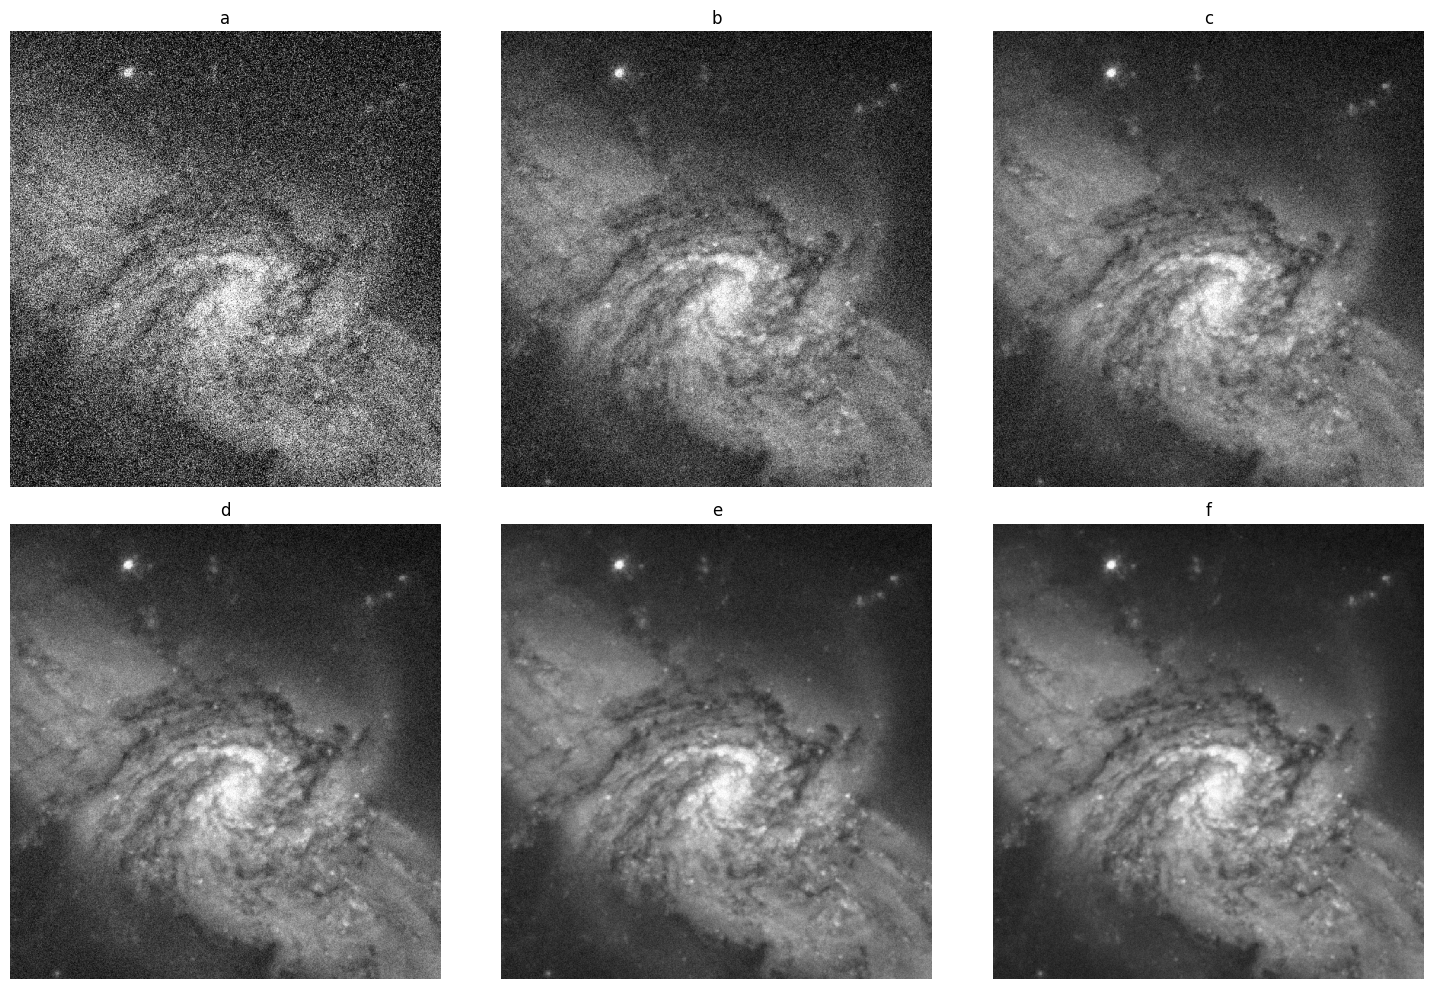

In [20]:
try:
    mean_ruido = 0
    std_dev_ruido = 64
    valores_K = [5, 10, 20, 50, 100]

    # 2. GERAR A PRIMEIRA IMAGEM RUIDOSA (NOSSO PONTO DE PARTIDA, K=1)
    print("Gerando imagem ruidosa inicial (K=1)...")
    img_float = img.astype(np.float64)
    ruido_exemplo = np.random.normal(mean_ruido, std_dev_ruido, img.shape)
    imagem_ruidosa_unica = np.clip(img_float + ruido_exemplo, 0, 255).astype(np.uint8)

    imagens_processadas = simular_media_de_imagens(
        imagem_array=img, 
        lista_K=valores_K, 
        std_dev=64
    )

    imagens_para_plotar = [imagem_ruidosa_unica] + imagens_processadas
    
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.flatten()
    name_figures = ["a", "b", "c", "d", "e", "f"]
    for i, img_np in enumerate(imagens_para_plotar):
        nome_arquivo = f"results/resultado_{name_figures[i]}.tif"
        cv.imwrite(nome_arquivo, img_np)
        
        axes[i].imshow(img_np, cmap='gray')
        axes[i].set_title(name_figures[i])
        axes[i].axis('off')
    plt.tight_layout()
    plt.savefig("results/painel_figures.tiff")
    plt.show()

except FileNotFoundError:
    print(f"Erro: Arquivo não encontrado em '{img_path}'")
except Exception as e:
    print(f"Ocorreu um erro: {e}")